In [47]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [6]:
# import .csv
csv_path = "wine_data.csv"
wine_df = pd.read_csv(csv_path)
wine_df

C:\Users\SageTeam\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Country,Points,Price,Province,Region,Variety
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon
1,US,96,90.0,California,Knights Valley,Sauvignon Blanc
2,US,96,65.0,Oregon,Willamette Valley,Pinot Noir
3,US,95,65.0,Oregon,Chehalem Mountains,Pinot Noir
4,US,95,60.0,California,Sonoma Coast,Pinot Noir
...,...,...,...,...,...,...
134423,South Africa,83,15.0,Stellenbosch,NaN,Pinotage
134424,South Africa,83,16.0,Stellenbosch,NaN,White Blend
134425,South Africa,82,15.0,Coastal Region,NaN,Merlot
134426,South Africa,82,14.0,Paarl,NaN,Merlot


In [ ]:
# jeanaej's code starts here

In [ ]:
# jeanaej's code ends here

In [ ]:
# natalia's code starts here

In [8]:
wine_df.nunique()

Country       12
Points        21
Price        355
Province     244
Region      1186
Variety      545
dtype: int64

In [9]:
US_only = wine_df.loc[wine_df["Country"] == "US"]
US_only

,Country,Points,Price,Province,Region,Variety
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon
1,US,96,90.0,California,Knights Valley,Sauvignon Blanc
2,US,96,65.0,Oregon,Willamette Valley,Pinot Noir
3,US,95,65.0,Oregon,Chehalem Mountains,Pinot Noir
4,US,95,60.0,California,Sonoma Coast,Pinot Noir
...,...,...,...,...,...,...
62134,US,82,10.0,California,California,Merlot
62135,US,82,10.0,California,California,Pinot Noir
62136,US,94,25.0,California,Anderson Valley,White Riesling
62137,US,93,30.0,California,North Coast,White Blend


In [40]:
us_var = US_only.groupby("Variety")
us_varieties = us_var.count()
us_varieties

,Country,Points,Price,Province,Region
Variety,,,,,
Aglianico,11,11,11,11,11
Albariño,89,89,89,89,89
Aleatico,2,2,2,2,2
Alicante Bouschet,7,7,7,7,7
Aligoté,10,10,10,10,10
...,...,...,...,...,...
Viognier-Valdiguié,1,1,1,1,1
White Blend,663,663,663,663,655
White Riesling,32,32,32,32,32


In [76]:
# Summing all varieties that will be lummped together
other = 0
for variety, row in us_varieties.iterrows():
    if row["Country"] < 1000:
        added = row["Country"]
        other = other + added
    else:
        pass
        
print(other)

12575


In [87]:
# Returns the top 40 varietals from US wineries
us_var_top = us_varieties.loc[us_varieties["Country"] >= 1000]

In [88]:
us_var_top.head()

,Country,Points,Price,Province,Region
Variety,,,,,
Bordeaux-style Red Blend,1829,1829,1829,1829,1824
Cabernet Franc,1008,1008,1008,1008,1008
Cabernet Sauvignon,9142,9142,9142,9142,9132
Chardonnay,8101,8101,8101,8101,8090
Merlot,3622,3622,3622,3622,3615


In [89]:
us_var_top.loc["Other Wine (206 Varietals)"] = [12575,12575,12575,12575,12575]
us_var_top = us_var_top.sort_values(by="Country", ascending=False)
us_var_top

C:\Users\SageTeam\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Country,Points,Price,Province,Region
Variety,,,,,
Other Wine (206 Varietals),12575,12575,12575,12575,12575
Pinot Noir,10265,10265,10265,10265,10265
Cabernet Sauvignon,9142,9142,9142,9142,9132
Chardonnay,8101,8101,8101,8101,8090
Syrah,4259,4259,4259,4259,4249
Zinfandel,3785,3785,3785,3785,3785
Merlot,3622,3622,3622,3622,3615
Red Blend,3320,3320,3320,3320,3303
Sauvignon Blanc,2582,2582,2582,2582,2581


In [115]:
# Labels for the sections of our pie chart
labels = us_var_top.index

# The values of each section of the pie chart
sizes = us_var_top["Country"]

# The colors of each section of the pie chart
# colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Seperate the top 3 Varietals
explode = (0, 0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)

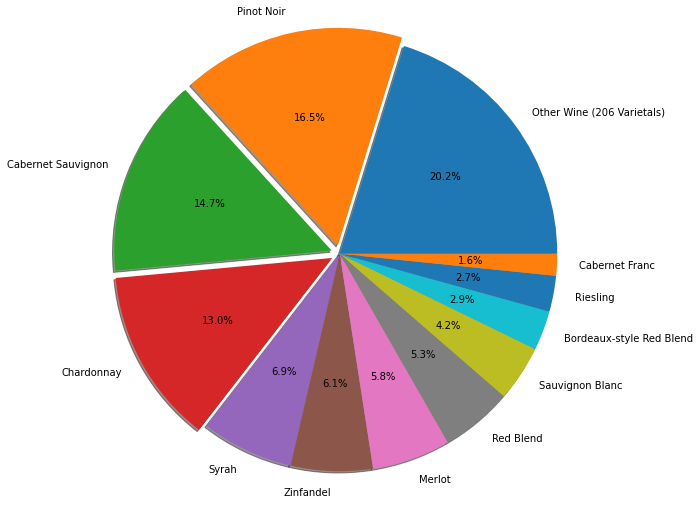

In [118]:
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, explode=explode, radius=2.5)
plt.show()

In [99]:
province = US_only.groupby("Province").count().sort_values(by="Country", ascending=False)
province

,Country,Points,Price,Region,Variety
Province,,,,,
California,44356,44356,44356,44356,44356
Washington,9684,9684,9684,9684,9684
Oregon,4571,4571,4571,4571,4571
New York,2415,2415,2415,2415,2415
Virginia,508,508,508,508,508
Idaho,136,136,136,30,136
New Mexico,95,95,95,95,95
Missouri,60,60,60,60,60
Pennsylvania,50,50,50,50,50


In [119]:
# Summing all varieties that will be lummped together
other_prov = 0
for prov, row in province.iterrows():
    if row["Country"] < 100:
        added_prov = row["Country"]
        other_prov = other_prov + added_prov
    else:
        pass
        
print(other_prov)

469


In [123]:
# Returns the top wine producing provinces in the US
province_top = province.loc[province["Country"] >1000]
province_top

,Country,Points,Price,Region,Variety
Province,,,,,
California,44356,44356,44356,44356,44356
Washington,9684,9684,9684,9684,9684
Oregon,4571,4571,4571,4571,4571
New York,2415,2415,2415,2415,2415


In [124]:
province_top.loc["Other Provinces (469 Provinces)"] = [469,469,469,469,469]
province_top = province_top.sort_values(by="Country", ascending=False)
province_top

C:\Users\SageTeam\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Country,Points,Price,Region,Variety
Province,,,,,
California,44356,44356,44356,44356,44356
Washington,9684,9684,9684,9684,9684
Oregon,4571,4571,4571,4571,4571
New York,2415,2415,2415,2415,2415
Other Provinces (469 Provinces),469,469,469,469,469


In [142]:
# Labels for the sections of our pie chart
labels = province_top.index

# The values of each section of the pie chart
sizes = province_top["Country"]

# The colors of each section of the pie chart
# colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Seperate the top 3 Varietals
explode = (0.1, 0, 0, 0, 0)

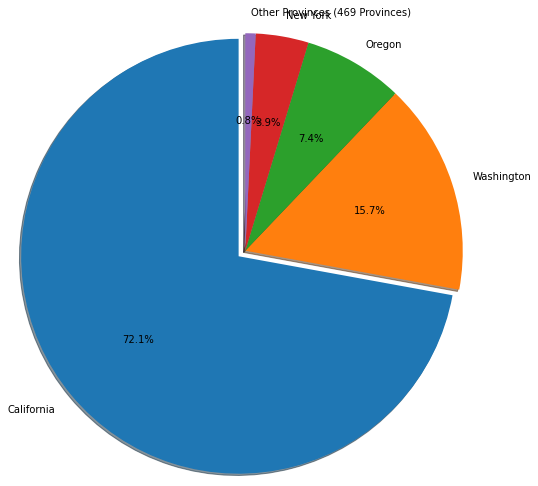

In [132]:
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, explode=explode, startangle=90, radius=2.5)
plt.show()

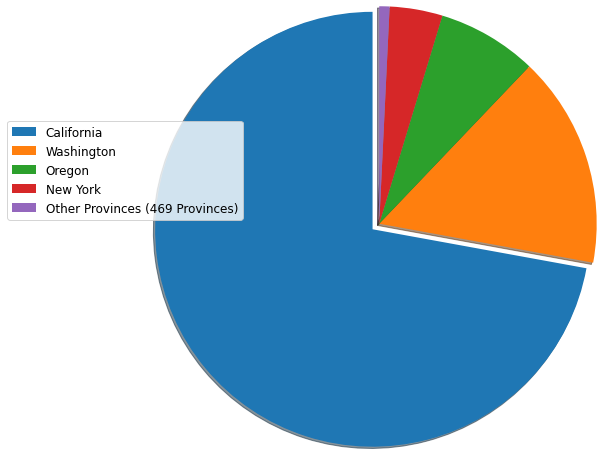

In [146]:
patches, text = plt.pie(sizes, shadow=True, explode=explode, startangle=90, radius=2.5)
    
plt.legend(patches, labels, loc="best", bbox_to_anchor=(-0.1,1.), fontsize=12)
plt.show()

# Avoiding overlapping labels
# https://stackoverflow.com/questions/23577505/how-to-avoid-overlapping-of-labels-autopct-in-a-matplotlib-pie-chart 
# Accessed 14 Feb 2021

In [152]:
ratio_df = wine_df
ratio_df["Points:Price"] = ratio_df["Points"]/ratio_df["Price"]
ratio_df

,Country,Points,Price,Province,Region,Variety,Points:Price
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon,0.408511
1,US,96,90.0,California,Knights Valley,Sauvignon Blanc,1.066667
2,US,96,65.0,Oregon,Willamette Valley,Pinot Noir,1.476923
3,US,95,65.0,Oregon,Chehalem Mountains,Pinot Noir,1.461538
4,US,95,60.0,California,Sonoma Coast,Pinot Noir,1.583333
...,...,...,...,...,...,...,...
134423,South Africa,83,15.0,Stellenbosch,NaN,Pinotage,5.533333
134424,South Africa,83,16.0,Stellenbosch,NaN,White Blend,5.187500
134425,South Africa,82,15.0,Coastal Region,NaN,Merlot,5.466667
134426,South Africa,82,14.0,Paarl,NaN,Merlot,5.857143


In [155]:
mean = ratio_df.groupby("Country").mean()
mean

,Points,Price,Points:Price
Country,,,
Argentina,86.001074,20.794881,5.906814
Australia,87.881488,31.258480,4.530457
Austria,89.190898,31.192106,3.762616
Chile,86.298127,19.344780,6.065113
France,88.603314,45.619885,3.745917
Germany,88.610567,39.011078,3.841479
Italy,88.445006,37.547913,3.727403
New Zealand,87.542671,24.173290,4.381576
Portugal,88.176724,26.332615,5.595943


In [157]:
median = ratio_df.groupby("Country").median()
median

,Points,Price,Points:Price
Country,,,
Argentina,86,15.0,5.866667
Australia,88,20.0,4.350000
Austria,89,25.0,3.625000
Chile,86,14.0,6.107143
France,88,25.0,3.461538
Germany,89,24.0,3.600000
Italy,88,25.0,3.461538
New Zealand,87,20.0,4.400000
Portugal,88,17.0,5.235294


In [168]:
mean_median = pd.merge(mean, median, left_index=True, right_index=True, suffixes=("_mean","_median"))
best = mean_median.sort_values(by="Points:Price_mean", ascending=False)

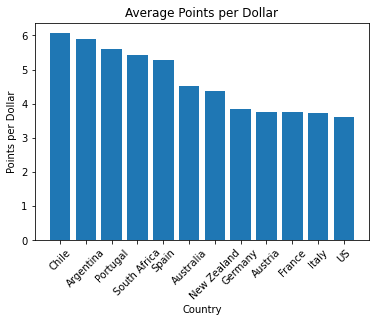

In [173]:
x_axis_country = best.index
point_per = best["Points:Price_mean"]
plt.bar(x_axis_country, point_per, align="center")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Points per Dollar")
plt.title("Average Points per Dollar")

plt.show()

In [ ]:
# natalia's code ends here

In [ ]:
# sharon's code starts here

In [ ]:
# sharon's code ends here